In [33]:
!pip install trdg matplotlib

In [2]:
!pip install Pillow==9.5.0

In [20]:
os.getcwd()

'/workspace'

In [1]:
import os
import random
from trdg.generators import GeneratorFromStrings
import matplotlib.pyplot as plt
import pandas as pd  

Missing modules for handwritten text generation.


In [2]:
# Пути к папкам для сохранения данных
train_output_folder = 'generated_data/sah_filtered'
val_output_folder = 'generated_data/val'

os.makedirs(train_output_folder, exist_ok=True)
os.makedirs(val_output_folder, exist_ok=True)

# Пути к файлам с текстом и шрифтами
fonts_list_file = 'text/okfonts_test.txt'
fonts_dir = '.'
text_file = 'text/sah.training_text'

In [3]:
font_paths = []

with open(fonts_list_file, 'r', encoding='utf-8') as f:
    font_dir_names = [line.strip() for line in f if line.strip()]

for font_dir_name in font_dir_names:
    font_dir_path = os.path.join(fonts_dir, font_dir_name)
    if not os.path.isdir(font_dir_path):
        print(f"Директория {font_dir_path} не найдена. Пропускаем её.")
        continue
    for root, dirs, files in os.walk(font_dir_path):
        for fname in files:
            if fname.lower().endswith(('.ttf', '.otf')):
                font_path = os.path.join(root, fname)
                font_paths.append(font_path)

print(f"Количество найденных файлов шрифтов: {len(font_paths)}")

Количество найденных файлов шрифтов: 75


In [4]:
with open(text_file, 'r', encoding='utf-8') as f:
    lines = [line.strip() for line in f if line.strip()]

print(f"Общее количество строк для генерации: {len(lines)}")

random.shuffle(lines)

Общее количество строк для генерации: 21757


In [5]:
# Разделение на тренировочный и валидационный наборы
validation_split = 0.2  # 20% данных для валидации
split_index = int(len(lines) * (1 - validation_split))

train_lines = lines[:split_index]
val_lines = lines[split_index:]

print(f"Количество тренировочных строк: {len(train_lines)}")
print(f"Количество валидационных строк: {len(val_lines)}")

Количество тренировочных строк: 17405
Количество валидационных строк: 4352


In [9]:
# Настройка генератора TRDG
generator_settings = {
    'fonts': font_paths,
    'size': 32,                  # Размер шрифта (можете настроить под свои нужды)
    'background_type': 0,        # Тип фона: 0 - однородный, 1 - шум, 2 - градиент
    'image_mode': 'RGB',
    'text_color': 'black',
    'skewing_angle': 0,
    'random_skew': False,
    'blur': 0,
    'random_blur': False,
    'is_handwritten': False,
    'alignment': 1,
    'width': 1200,
    'fit': True,
    'space_width': 1.0,
    'character_spacing': 0,
    'stroke_width': 0,
    'stroke_fill': '#ffffff'
}

In [10]:
# Функция для генерации данных и сохранения в CSV
def generate_and_save(generator, lines, output_folder, csv_filename):
    labels = []
    for idx, (img, lbl) in enumerate(generator):
        image_filename = f"{idx}.jpg"
        image_path = os.path.join(output_folder, image_filename)
        img.save(image_path)
        labels.append((image_filename, lbl))
        
        if (idx + 1) % 1000 == 0:
            print(f"Сгенерировано {idx + 1} изображений в {output_folder}...")
    
    print(f"Генерация в {output_folder} завершена. Всего сгенерировано {len(labels)} изображений.")
    
    # Сохранение меток в labels.csv с использованием pandas
    df_labels = pd.DataFrame(labels, columns=['filename', 'words'])
    labels_csv_path = os.path.join(output_folder, csv_filename)
    df_labels.to_csv(labels_csv_path, index=False, encoding='utf-8')
    
    print(f"Файл меток сохранен: {labels_csv_path}")

In [11]:
# Генерация тренировочных данных
print("Генерация тренировочных изображений...")
train_generator = GeneratorFromStrings(
    strings=train_lines,
    count=len(train_lines),
    **generator_settings
)
generate_and_save(train_generator, train_lines, train_output_folder, 'labels.csv')

Генерация тренировочных изображений...
Сгенерировано 1000 изображений в generated_data/sah_filtered...
Сгенерировано 2000 изображений в generated_data/sah_filtered...
Сгенерировано 3000 изображений в generated_data/sah_filtered...
Сгенерировано 4000 изображений в generated_data/sah_filtered...
Сгенерировано 5000 изображений в generated_data/sah_filtered...
Сгенерировано 6000 изображений в generated_data/sah_filtered...
Сгенерировано 7000 изображений в generated_data/sah_filtered...
Сгенерировано 8000 изображений в generated_data/sah_filtered...
Сгенерировано 9000 изображений в generated_data/sah_filtered...
Сгенерировано 10000 изображений в generated_data/sah_filtered...
Сгенерировано 11000 изображений в generated_data/sah_filtered...
Сгенерировано 12000 изображений в generated_data/sah_filtered...
Сгенерировано 13000 изображений в generated_data/sah_filtered...
Сгенерировано 14000 изображений в generated_data/sah_filtered...
Сгенерировано 15000 изображений в generated_data/sah_filtere

In [12]:
# Генерация валидационных данных
print("Генерация валидационных изображений...")
val_generator = GeneratorFromStrings(
    strings=val_lines,
    count=len(val_lines),
    **generator_settings
)
generate_and_save(val_generator, val_lines, val_output_folder, 'labels.csv')

Генерация валидационных изображений...
Сгенерировано 1000 изображений в generated_data/val...
Сгенерировано 2000 изображений в generated_data/val...
Сгенерировано 3000 изображений в generated_data/val...
Сгенерировано 4000 изображений в generated_data/val...
Генерация в generated_data/val завершена. Всего сгенерировано 4352 изображений.
Файл меток сохранен: generated_data/val/labels.csv


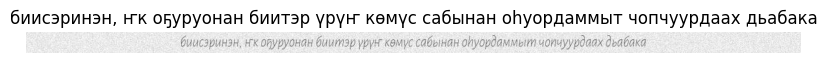

In [15]:
# Отображение примера сгенерированного изображения
sample_image_path = os.path.join(val_output_folder, '0.jpg')
if os.path.exists(sample_image_path):
    img = plt.imread(sample_image_path)
    plt.figure(figsize=(10, 4))
    plt.imshow(img)
    plt.axis('off')
    # Загрузка меток для отображения
    df_train_labels = pd.read_csv(os.path.join(val_output_folder, 'labels.csv'))
    plt.title(df_train_labels.iloc[0]['words'])
    plt.show()
else:
    print(f"Сгенерированное изображение {sample_image_path} не найдено.")